In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
import gzip
import os
import pickle
import plotutils.plotutils as pu
import rebound as re
import seaborn
import sys

Populating the interactive namespace from numpy and matplotlib


/Users/farr/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
seaborn.set_style('ticks')

In [3]:
sim = re.Simulation()
sim.add(['Sun', 'Jupiter', 'Saturn', 'Uranus', 'Neptune'])
sim.add(m=3e-5, a=700, e=0.6, omega=150.0*pi/180.0, inc=30.0*pi/180.0, l=random.uniform(low=0,high=2*pi)) # Perturber
sim.move_to_com()
sim.dt = 1.0
sim.integrator = 'whfast'
sim.integrator_whfast_safe_mode = 0
sim.integrator_whfast_corrector = 11
sim.status()

Searching NASA Horizons for 'Sun'... Found: Sun (10).
Searching NASA Horizons for 'Jupiter'... Found: Jupiter Barycenter (5).
Searching NASA Horizons for 'Saturn'... Found: Saturn Barycenter (6).
Searching NASA Horizons for 'Uranus'... Found: Uranus Barycenter (7).
Searching NASA Horizons for 'Neptune'... Found: Neptune Barycenter (8).
---------------------------------
REBOUND version:     	2.13.5
REBOUND built on:    	Feb 22 2016 15:29:40
Number of particles: 	6
Selected integrator: 	whfast
Simulation time:     	0.000000
Current timestep:    	1.000000
---------------------------------
<rebound.Particle object, id=0 m=1.0 x=-0.0168662592704 y=0.0219758238278 z=0.0114994703163 vx=1.64894141113e-05 vy=0.000402647654825 vz=-1.04622484939e-06>
<rebound.Particle object, id=0 m=0.000954791915211 x=-5.30337982904 y=1.23749325049 z=0.124744099919 vx=-0.103606994823 vy=-0.406792336295 vz=0.00400843451529>
<rebound.Particle object, id=0 m=0.000285885672722 x=-3.46642276208 y=-9.37802416103 z=0.3

In [4]:
Ntest = 1000
for i in range(Ntest):
    a = random.uniform(low=150, high=550)
    q = random.uniform(low=30, high=50)
    e = 1 - q/a
    inc = abs(random.randn()*15.0*pi/180.0)
    omega = random.uniform(low=0, high=2*pi)
    Omega = random.uniform(low=0, high=2*pi)
    l = random.uniform(low=0, high=2*pi)
    sim.add(a=a, e=e, inc=inc, omega=omega, Omega=omega, l=l)
sim.N_active = sim.N - Ntest

In [5]:
%%time
orbs = []
ts = []
for t in linspace(0, 2*pi*1000000, 1000):
    sim.integrate(t, exact_finish_time=0)
    print 'Integrated to ', sim.t
    orbs.append(sim.calculate_orbits())
    ts.append(sim.t)
orbs = array(orbs)
ts = array(ts)

Integrated to  0.0
Integrated to  6290.0
Integrated to  12579.0
Integrated to  18869.0
Integrated to  25158.0
Integrated to  31448.0
Integrated to  37737.0
Integrated to  44027.0
Integrated to  50316.0
Integrated to  56606.0
Integrated to  62895.0
Integrated to  69185.0
Integrated to  75474.0
Integrated to  81764.0
Integrated to  88053.0
Integrated to  94343.0
Integrated to  100632.0
Integrated to  106922.0
Integrated to  113211.0
Integrated to  119501.0
Integrated to  125790.0
Integrated to  132079.0
Integrated to  138369.0
Integrated to  144658.0
Integrated to  150948.0
Integrated to  157237.0
Integrated to  163527.0
Integrated to  169816.0
Integrated to  176106.0
Integrated to  182395.0
Integrated to  188685.0
Integrated to  194974.0
Integrated to  201264.0
Integrated to  207553.0
Integrated to  213843.0
Integrated to  220132.0
Integrated to  226422.0
Integrated to  232711.0
Integrated to  239001.0
Integrated to  245290.0
Integrated to  251579.0
Integrated to  257869.0
Integrated to

In [108]:
orbs = []
ts = []
with gzip.open('orbits.pkl.gz', 'r') as inp:
    try:
        while True:
            t, orb = pickle.load(inp)
            ts.append(t)
            orbs.append(orb)
    except EOFError:
        pass
orbs = array(orbs)
ts = array(ts)
print orbs.shape, ts.shape

(175, 1005) (175,)


In [6]:
stable_orbits = []
for i in range(5, orbs.shape[1]):
    smas = orbs[:,i]['a']
    es = orbs[:,i]['e']
    if np.all(smas > 0) and np.all(es >= 0) and np.all(es <= 1):
        stable_orbits.append(orbs[:,i])
stable_orbits = array(stable_orbits).T
stable_orbits.shape

(1000, 1000)

(50, 1000, 0.0, 400.0)

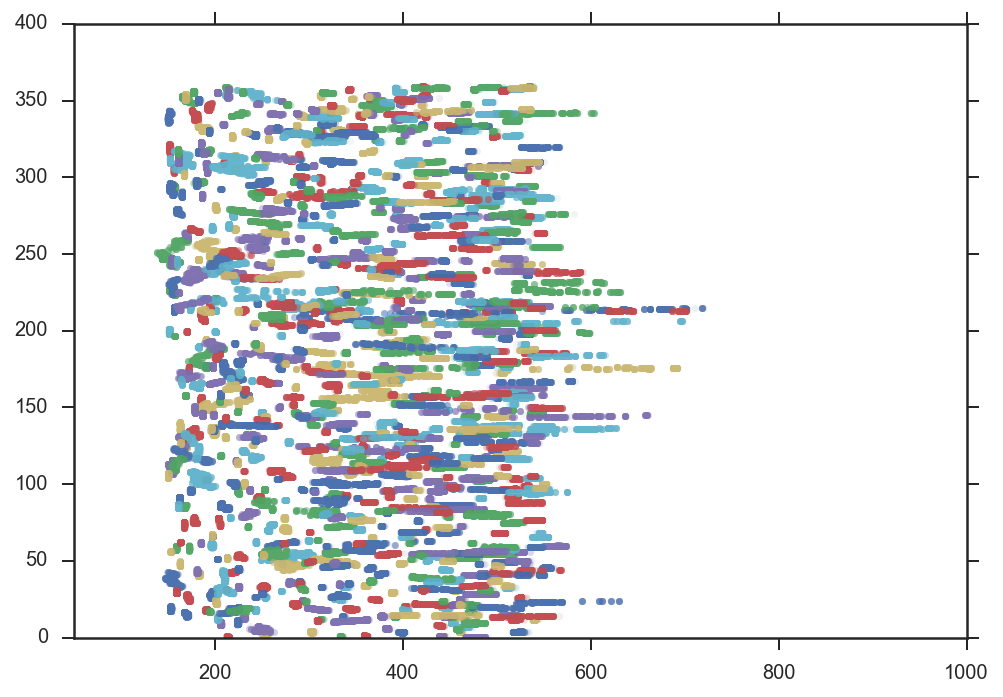

In [11]:
for i in range(stable_orbits.shape[1]):
    plot(stable_orbits[:,i]['a'], 180.0/pi*fmod(stable_orbits[:,i]['pomega'] - orbs[:,4]['pomega'] + 4*pi, 2*pi), '.', alpha=0.1)
axis(xmin=50, xmax=1000)